## Shifting Gears

Up until now, we've focused primarily on estimating the average treatment effect. And we had very good reasons to do so. If we remember the fundamental problem of causal inference, it says that we can never know the individual treatment effect \\(Y_{1i} - Y_{0i}\\) because we can only observe one of the potential outcomes. What we did then was focusing on the easier (or at least feasible) task of estimating the Average Treatment Effect \\(E[Y_1 - Y_0]\\). 

This alone is profoundly useful. It helps us answer if it's worth sending our kids to college, if imigration increases unemployment or if positive thinking impacts one's earnings. But now we want something more.

The problem is that not everyone reacts the same to a treatment. This is very clear in medicine. Men and women might have very different reactions to a drug. Some treatment might work on young patients but have nasty side effects for older folks. Similarly, we can apply this notion to any other field. Some people will only get a loan under very low interest rates. You will lose some customers and gain others if the quality and price of your products go up. Meditation can increase the productivity of some employees and not others.

The fact that people react differently to a treatment opens up the possibility of personalisation. When we personalise, we are recognizing that people wish to be treated differently according to their own unique preferences and circumstances. Sometimes, personalisation is the only thing making a product viable. An example of this is credit. On average, if you give low interest rates, the loans become unprofitable for the lending company. However, if you find the right people to give this kind of credit, then it can become a very profitable business. Another example is coupons. A discount coupon can be unprofitable for the business that gives them. However, if it only gives to those that respond to the coupons by becoming loyal customers, then giving coupons is good business.

Needless to say, there is plenty of money to be made with personalisation. This is of course positive to us, but it also makes matters a little bit more complicated. Lots of professionals tried to tackle personalisation from different angles, which makes the literature not so coherent. Often, you will find the same concepts referred to with tons of different names. Not only that, but personalisation is a science that it is still on its infancy. New methods are being developed every month and, until now, there isn't a clear winner. Also, from now on, I'll rely much more on my personal experience than before. This means I'll be wrong more often. I'll make more mistakes either because of ignorance of some latest developments or because what I write now could be disproven very soon. Things will be much less clear cut from now on. On the other hand, if you are indeed Brave and True, they will also be more exciting. 

## The Causal Language of Personalisation

To try to make sense of all the personalisation literature, we will talk about the terms of Causal Inference we've developed so far. If you think about it, what personalisation is all about is finding entities that respond better to some treatment. With this information, we can give the treatment only to those entities. In potential outcome terms, we are moving from estimating the Average Treatment Effect, \\(E[Y_1 - Y_0]\\), to estimating a Conditional Average Treatment Effect

$$
E[Y_1 - Y_0 | X]
$$

Make no mistake, it is still impossible to find the individual treatment effect. But this doesn't mean we can't try to find different average treatment effects in small subgroups. By switching the question from "what is the causal impact of this intervention" to "what is the impact of this intervention on this type of entities" we move in the direction of personalisation. This is what the above formula is expressing. It is the treatment effect broken down into subgroups of some feature or set of features \\(X\\).

To make things more concrete, pretend you came up with some clever online learning methods with lots of memes and jokes to keep the students engaged. You now want to know if your method is better than other methods. Specifically, you want to know if your method is so much better that it can increase your students earnings because they learn more and that gets reflected in their general productivity. 

In order to test your method, you run an RCT where you select a group of people and randomly give some of them the opportunity to participate in a business training with you (and, for the sake of the argument, pretend that everyone actually attends, so compliance is 100%). Those that didn't get your training got another one with someone else that didn't use your method.

After some time, you call people back and check how much they are making. Because you are so nice and charming they actually tell you. With this data, you plot the earnings of those who got your training in red and of those that didn't, in blue. Just for fun, you decide to plot their results against the person's age (which they also told you on the phone previously). 

![img](./data/img/personalisation/conditional_ate.png)

When you look at the plot, you notice that the red dots are, on average, above the blue dots, Hurray! Your method indeed works better! To put a number into it, you find that the average effect of your method is, say 100 dollars. So \\(ATE = E[Y_1 - Y_0] = 100\\). But then, you also notice something else. You see that older folks don't respond very well to your training. As a matter of fact, the earnings of those who got your training are not statistically different from those that got it from someone else. In other words, the average treatment effect for this group is zero: \\(E[Y_1 - Y_0 | Age > 50] = 0\\). 

That's interesting. You still managed to have, on average, positive ATE, but one group of people have an ATE of zero! How come? When you look at the middle ages, you see that they are somewhat more responsive to the treatment. You notice that blue dots are a little below the red dots. When you compute the ATE for those folks, it ends up being 75, so  \\(E[Y_1 - Y_0 | 25 > Age > 50] = 75\\). But the real deal is when you look at the younger folks. You can see that, for them, your method is significantly better than some other method. For this group, the blue dots are way below the red treated dots. In fact, when you estimate the ATE it ends up being \\(E[Y_1 - Y_0 | Age < 25] = 250\\). 

The final conclusion is that your method is, on average, better than the others. But not only that, you can even say for whom is better! It is better for the young and not effective at all for the old. This information allows you to make interventions that are much more precise. In other words, it allows you to personalise your treatment.  

This partitioning of the feature space followed by the estimation of local ATE is what personalisation is about. Just as a general warning, this personalisation thing comes under many different names. One we will often see (and use) is **heterogeneous treatment effect estimation**. It refers to our interest in finding the ways the ATE differ from one subpopulation to another. Another name for it could be **uplift modeling**, since we are interested in figuring out the uplift of a treatment in our response variable. Regardless of the name, what here is always to find different treatment effects in different subpopulations. 

## Evaluating Personalisation

Conditional ATE estimation is much more difficult than estimating the simple marginal ATE. The reason is that personalisation is a two step process where the first one is exactly like what we've seen so far when estimating dealing with causal inference: removing bias. Personalisation can't be done with biased data, which means we have to come up with some clever ways of eliminating bias. If this wasn't difficult enough, after we've taken care of that, we still need to know which personalisation is better. Since we've already spent a lot of time exploring the first step, let's take a deeper look into the second.

First, let me explain what I mean by better personalisation. Back to our revolutionary training method example, suppose one of your friends comes to you and says: "look, it's fine and all that you found some nice heterogeneity in the ATE when you broke the population by age, but look at what happens when you break it down by years of education. It's a much better way at looking at things!" and he shows you the plot below:

![img](./data/img/personalisation/eval.png)

I hope you see the point I'm trying to make here. Your friend has a point. You can see that there is room for personalisation across years of education, after all, people with different years of education respond differently to your treatment. But which one should you prefer?

It's a tough  question. To be fair, I'm not entirely confident in the method I'm about to show. Still, let me try to make an argument why I think using Years of Education is a better choice than using age. First, let me add a third possibility to the picture because it will make things a bit more clear. Suppose you also have to consider using a third option for segmenting the population. But this option is a bit weird. It is just a random variable. You've asked your computer to generate random numbers and you use that instead of a real variable. What would happen then?

![img](./data/img/personalisation/rnd_split.png)

Since this variable is random, if you look at the samples in any segment of it, they will be representative  of your entire sample. It will be a random sample of your sample. Statistically speaking, it will look just like your entire sample. This means that the treatment effect you will estimate in any subset of the population defined by this random variable is exactly the same as the general or marginal ATE. You will notice that the red (treated) dots are  a bit above the blue (untreated) dots as expected, since the treatment was said to have, on average, a positive impact.

It is also intuitive why it is not a very wise choice to pick this random variable as our choice for personalisation. Every segment of it has the exact same ATE, so, in this particular case, \\(E[Y_1 - Y_0 | Rnd] = E[Y_1 - Y_0]\\). We can say that this variable doesn't modify the causal effect, hence, it is useless for personalisation. 

Now that we got this out of the way, let's understand why we can use the other variables and how we can benefit from one more than from the other. If we partition the dataset into 3 quantiles defined by the features and estimate the ATE on each quantile, we would have something like this:

![img](./data/img/personalisation/bins.png)

For the Age feature, we would see a higher ATE on the youngest quantile and little effect on the older. For the Years of Education feature, ATE would be negative for very few years of education, but would grow higher and higher. Finally, for the random columns, the ATE should be roughly the same across all quantiles. Since the global ATE is positive, so should it be all of the ATEs in the random column.

In the case of the random variable and age, the ATE is positive for all quantiles, so we should treat everyone. But for the years of education, we should only treat those with the positive ATE. A word of caution here is that the X axis no longer represents the feature. Rather, it represents the feature quantile, ordered by ATE.


![img](./data/img/personalisation/cummulative.png)

In the case of the random variable and age, the ATE is positive for all quantiles, so we should treat everyone. But for the years of education, we should only treat those with the positive ATE. A word of caution here is that the X axis no longer represents the feature. Rather, it represents the feature quantile, ordered by ATE.

Finally, if we plot the cumulative ATE curve, we get what is called the **Quini Curve**. They all start and end at the same point. However, the better the personalization is, the higher will be the area under this curve. The point here is: the bigger the belly of the curve, the better the personalisation. If there are subgroups with negative ATE, the Quini curve will go up and then down, as in the case of the Years of Education segmentation. If the ATE is always positive, the Quini curve will go only up. We can plot the 3 personalization candidates together to get a better sense of which one is better.

![img](./data/img/personalisation/quini.png)

As we can see, the Quini curves give an intuitive reason to why I've said the Years of Education is the best variable to personalize the treatment effect. It is the one where the treatment effect varies the most and hence, leads to a higher Quini Curve.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

style.use("fivethirtyeight")

For some code examples, I've simulated data like the one I've drawn above. For this data, the best variable to use for personalisation is also Years of Education. I've also made it so that the treatment is randomly assigned. This way, we won't have to worry about bias for now.

In [2]:
df = pd.read_csv("./data/personalisation_eval.csv")
df.head()

,income,educ,age,t,rnd
0,830.0,3.0,43.0,1,11.0
1,1127.0,7.0,21.0,1,16.0
2,896.0,10.0,67.0,1,6.0
3,909.0,4.0,36.0,0,29.0
4,867.0,4.0,46.0,0,34.0


The first thing we need to do for personalisation is create some sort of model that will assign a treatment effect for each entity in our analysis. For our case, this model is very simple: we will look at each feature quantile and compute the ATE.

In [3]:
def group_ate(data, group_col, bins=4):
    bin_col = f"{group_col}_q"
    return (data
            # compute the bins
            .assign(**{bin_col: pd.qcut(data[group_col], bins)})
            
            # average outcome by bin and treatment assigned
            .groupby([bin_col, "t"])[["income"]]
            .mean()
            .reset_index()
            
            # reshape to have a treated and control column
            .pivot(bin_col, "t", "income") 
            .assign(ate=lambda d: d[1] - d[0]) # compute the ATE
           )

group_ate(df, "age")

t,0,1,ate
age_q,,,
"(17.999, 33.75]",925.307692,1153.916667,228.608974
"(33.75, 47.0]",952.571429,1049.565217,96.993789
"(47.0, 64.0]",971.000000,1035.588235,64.588235
"(64.0, 80.0]",1004.909091,1103.192308,98.283217


Then, we will join this small table on the original dataset, matching the feature bins.

In [4]:
def conditional_ate_model(data, group_col, bins=4):
    
    bin_col = f"{group_col}_q"
    
    # compute the bins for a join
    df_bin = (data
              .assign(**{bin_col: pd.qcut(data[group_col], bins)})
              .set_index(bin_col))
    
    return (group_ate(data, group_col, bins)
            [["ate"]]
            .join(df_bin) # join binned data on ATE table
            .reset_index(drop=True))

age_ate = conditional_ate_model(df, "age")
rnd_ate = conditional_ate_model(df, "rnd")
educ_ate = conditional_ate_model(df, "educ")
age_ate.head()

,ate,income,educ,age,t,rnd
0,228.608974,1127.0,7.0,21.0,1,16.0
1,228.608974,940.0,13.0,20.0,0,45.0
2,228.608974,1136.0,10.0,25.0,1,42.0
3,228.608974,1279.0,13.0,31.0,1,41.0
4,228.608974,1450.0,18.0,29.0,1,48.0


With this, we can estimate the Quini Curve. But we will make it more fine tuned here. Imagine that each sample is its own bin. This will lead to a very fine tuned Quni Curve. After we've sorted the data by the ATE, let \\(Y_{Tn}\\) be the nth treated sample outcome and \\(N_{Tn}\\) be the cumulative count for the treated up until the nth sample. Similarly, define \\(Y_{Cn}\\) and \\(N_{Cn}\\) for the control group. Then, the Quini curve is defined by this formula.

$$
f(n) = \Bigg(\dfrac{Y_{Tn}}{N_{Tn}} - \dfrac{Y_{Cn}}{N_{Cn}} \Bigg)*(N_{Cn} * N_{Tn})
$$

Notice how the first parenthesis have something that reminds us of the difference between treated and control. Is a sort of running difference as we move forward in the ordered ATE line. Again, if you understand code better than formula, here it is:

In [5]:
def quini(df):
    sorted_df = df.sort_values(by="ate", ascending=False)
    
    y_t_cumm = (sorted_df["income"] * sorted_df["t"]).cumsum()
    y_c_cumm = (sorted_df["income"] * (1-sorted_df["t"])).cumsum()
    t_cumm = sorted_df["t"].cumsum()
    c_cumm = (1-sorted_df["t"]).cumsum()
    
    return ((y_t_cumm/t_cumm - y_c_cumm/c_cumm)*(t_cumm+c_cumm)).fillna(0)

quini(educ_ate).head()

199       0.000000
179     470.000000
177     618.000000
176     845.333333
175    1351.666667
dtype: float64

We can now plot the Quini Curve for the random variable, Years of Education and Age. Notice how the random variable is not a straight line. Since we have a very small sample size, some variation might make it so that one quantile has a higher ATE than another. Still, it is a good idea to plot it as a benchmark.

In [6]:
quini_educ = quini(educ_ate)
quini_rnd = quini(rnd_ate)
quini_age = quini(age_ate)

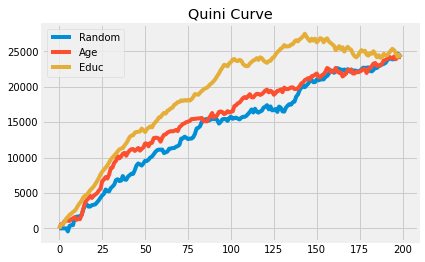

In [7]:
plt.plot(range(len(quini_rnd)), quini_rnd, label="Random")
plt.plot(range(len(quini_age)), quini_age, label="Age")
plt.plot(range(len(quini_educ)), quini_educ, label="Educ")
plt.title("Quini Curve")
plt.legend();